In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random 

In [168]:
df = pd.read_csv("creditcard.csv")

In [169]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [196]:
X = df.iloc[:,0:len(df.columns)-2].values
amt =  df.iloc[:,len(df.columns)-2:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values

In [198]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [199]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [200]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [201]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0])
eig_pairs.reverse()
for i in eig_pairs:
    print(i[0])

1.68411478505233
1.000003511162006
1.0000035111619925
1.0000035111619894
1.0000035111619883
1.000003511161988
1.0000035111619867
1.000003511161986
1.0000035111619858
1.0000035111619854
1.000003511161985
1.0000035111619847
1.0000035111619843
1.0000035111619838
1.0000035111619832
1.000003511161983
1.000003511161983
1.0000035111619825
1.000003511161982
1.0000035111619818
1.0000035111619812
1.000003511161981
1.000003511161981
1.0000035111619796
1.0000035111619787
1.0000035111619785
1.0000035111619776
1.00000351116196
0.3158922372716376


In [216]:
 matrix_w = np.hstack((eig_pairs[0][1].reshape(29,1), 
                      eig_pairs[1][1].reshape(29,1), 
                      eig_pairs[2][1].reshape(29,1), 
                      eig_pairs[3][1].reshape(29,1), 
                      eig_pairs[4][1].reshape(29,1), 
                      eig_pairs[5][1].reshape(29,1)))

#print(matrix_w)

In [217]:
matrix_new = X_std.dot(matrix_w)

In [232]:
 matrix_final = []
for i,j in zip(matrix_new,amt):
    i = np.append(i, j)
    matrix_final.append(i)

In [235]:
centers = []
for i in range(6):
    a = random.randint(0,len(matrix_final))
    centers.append(matrix_final[a])

In [236]:
centers

[array([ 0.87754022,  0.51300644,  1.48449103, -0.46579797, -0.20871135,
        -0.51668008, 25.        ]),
 array([-1.48937354e+00,  2.03752575e-01, -1.28290731e+00,  2.53201870e-01,
        -1.49941517e+00, -1.54724719e+00,  2.33000000e+02]),
 array([-1.08231378e+00,  4.45780046e-03, -8.40215264e-01,  3.60116420e-01,
        -9.64485663e-01, -8.25101953e-01,  2.65500000e+01]),
 array([5.36210079e-01, 4.67937147e-01, 2.28855328e-01, 7.09579801e-01,
        1.52286071e+00, 2.04498416e+00, 3.03470000e+02]),
 array([ 8.81896216e-01,  8.61701369e-01,  9.64515510e-02, -1.91454499e-01,
         1.37002272e+00,  1.32148222e+00,  4.42000000e+02]),
 array([ 0.25251501, -0.16430287,  3.48269404,  0.14770042, -2.62167934,
        -0.61914487,  1.        ])]

In [237]:
clusters = []
for i in centers:
    clusters.append([])

In [238]:
def euclidean_distance(x,y):
    count = 0
    #print(x,y)
    for i,j in zip(x,y):
        
        count += (i - j) * (i - j)
    return math.sqrt(count)

In [239]:
def min_distance(x):
    return x.index(min(x))

In [240]:
min_list = []
for i in range(len(matrix_final)):
    for j in centers:
        min_list.append(euclidean_distance(matrix_final[i],j))
    l = min_distance(min_list)
    clusters[l].append(i)
    min_list = []    

In [241]:
for i in range(len(clusters)):
    print("Cluster {}".format(i+1))
    for j in range(10):
        print(matrix_final[clusters[i][j]])

Cluster 1
[ 1.84499993  0.46432593  0.31946673  0.20950522  0.06900747  0.44911362
 27.5       ]
[ 1.87481687 -1.05023829  0.56551251 -0.88019348 -2.00069276 -1.83294502
 15.99      ]
[ 1.99664963  0.32093868 -0.02743047  0.06196191 -0.47874491 -0.36348623
 12.99      ]
[ 2.22912847  0.83401835  0.09173624  0.35503515 -0.8564976   0.41036281
 22.75      ]
[ 1.6980362   0.49548331  0.64176627  0.66491366  0.93841441  1.17316862
 26.43      ]
[ 1.80100705 -0.17001445 -2.35033023  0.12893504  0.6265453   0.65195979
 16.        ]
[ 2.08282714  1.22723714 -0.35533149  0.41786255 -0.68565034 -0.6006164
 12.99      ]
[ 1.62836542  0.22598303  0.45482871  0.05211458  1.19832078  1.48730738
 17.28      ]
[ 2.37929491  0.91235     1.60196969  0.16521945 -0.6067877  -0.47531559
 20.53      ]
[ 2.00405681  0.19280641  0.48435377 -0.38813194 -0.15226256 -0.074465
 14.8       ]
Cluster 2
[  2.54790534   0.61554486  -0.33816959  -0.34335822  -0.60123762
  -0.63940331 149.62      ]
[ 2.07697444e+00  7

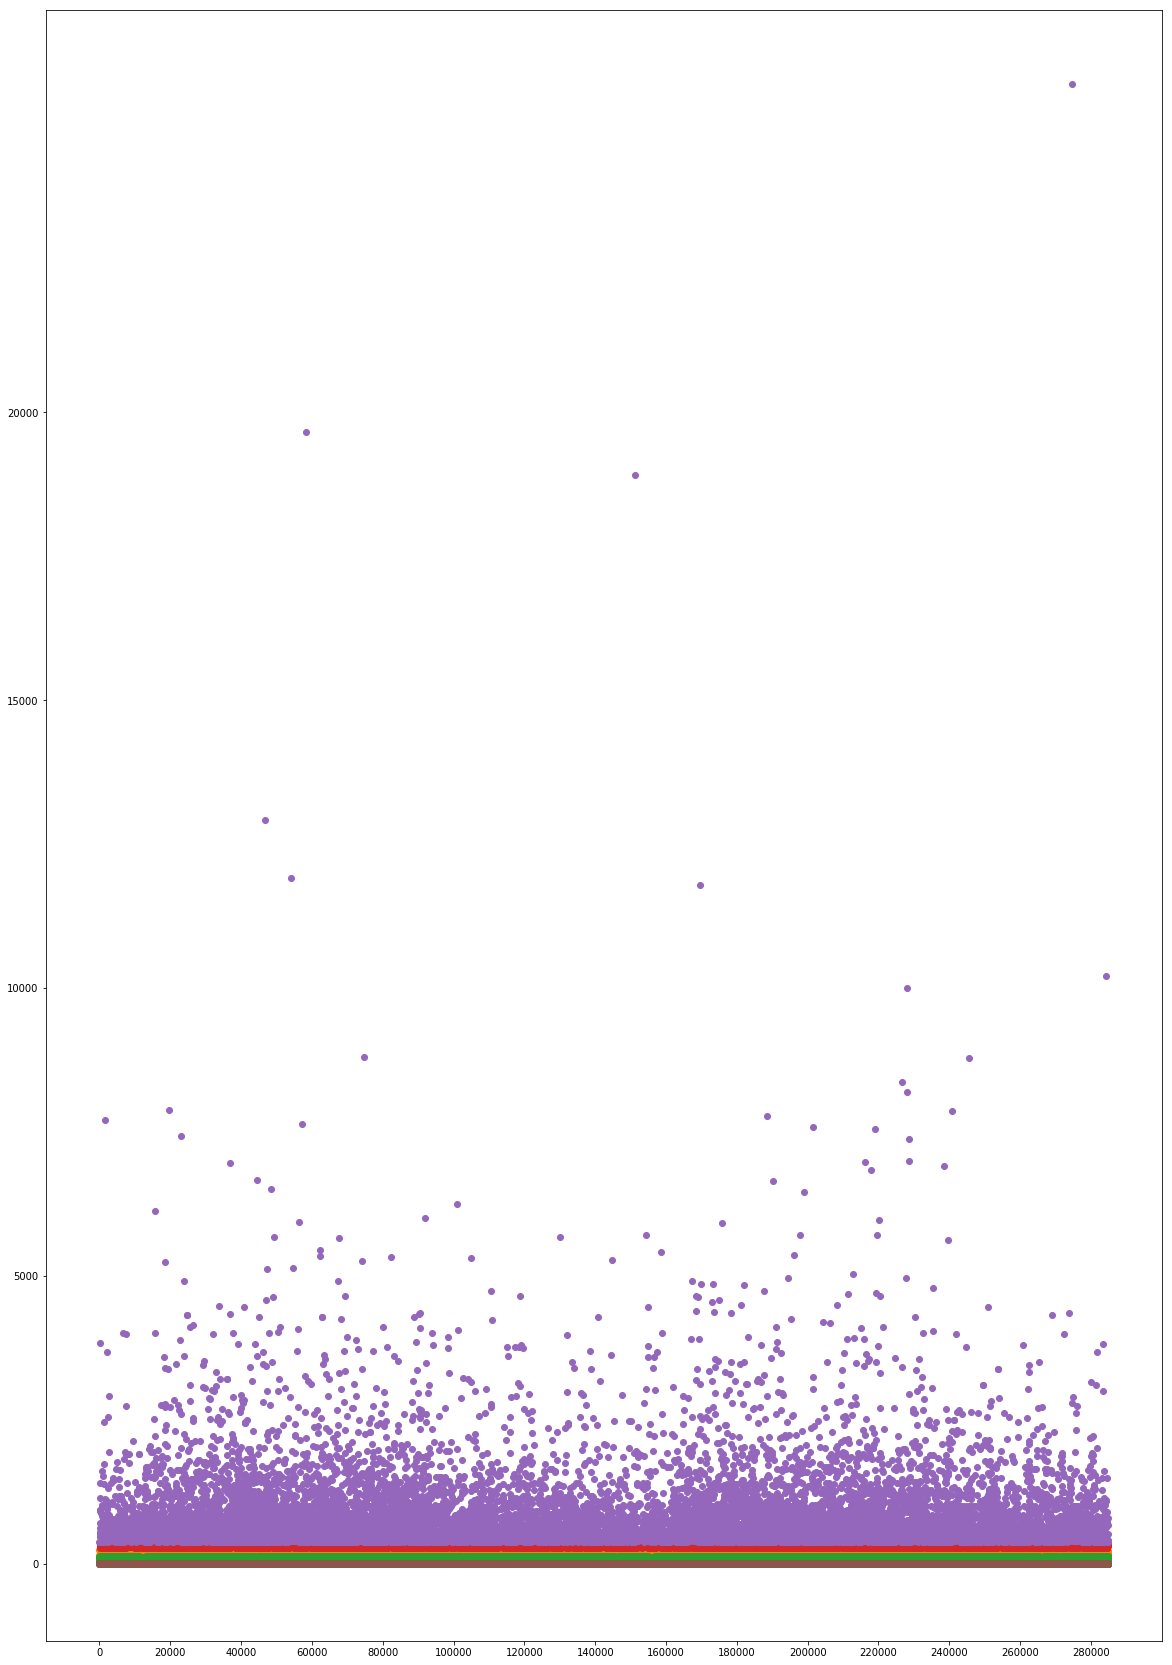

In [261]:
a = []
plt.figure(figsize=(20,30))
plt.yticks(np.arange(0, 25000, 5000))
plt.xticks(np.arange(0, 284807, 20000))
for i in range(0,len(clusters)):
    for j in clusters[i]:
        a.append(matrix_final[j][6])
    plt.scatter(clusters[i],a)
    a=[]